In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random as r

In [133]:
train = pd.read_csv("train.csv")

In [134]:
train.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


<h2>Data cleaning </h2>

<AxesSubplot:>

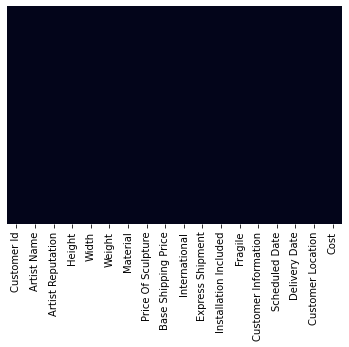

In [148]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False)

In [136]:
train.drop('Transport',axis=1,inplace=True)

In [30]:
def impute_artist(cols):
    if pd.isnull(cols):
        return train['Artist Reputation'].mean()
    else:
        return cols

In [137]:
train['Artist Reputation']=train['Artist Reputation'].apply(impute_artist)

In [38]:
def impute_width(cols):
    if pd.isnull(cols):
        return train['Width'].mean()
    else:
        return cols

In [143]:
train['Weight'] = train['Weight'].apply(impute_weight)

In [44]:
train['Material'].value_counts()

Brass        847
Aluminium    845
Bronze       821
Marble       819
Wood         816
Clay         816
Stone        772
Name: Material, dtype: int64

In [51]:
def impute_material(cols):
    L=['Brass','Alumininum','Bronze','Marble','Wood','Clay','Stone']
    i=r.randint(0,6)
    if pd.isnull(cols):
        return L[i]
    else:
        return cols

In [145]:
train['Material'] = train['Material'].apply(impute_material)

In [147]:
train.drop('Remote Location',axis=1,inplace=True)

<h2>Exploritory data analysis </h2>

In [59]:
train.columns

Index(['Customer Id', 'Artist Name', 'Artist Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price Of Sculpture', 'Base Shipping Price',
       'International', 'Express Shipment', 'Installation Included', 'Fragile',
       'Customer Information', 'Scheduled Date', 'Delivery Date',
       'Customer Location', 'Cost'],
      dtype='object')

<AxesSubplot:xlabel='Artist Reputation', ylabel='Price Of Sculpture'>

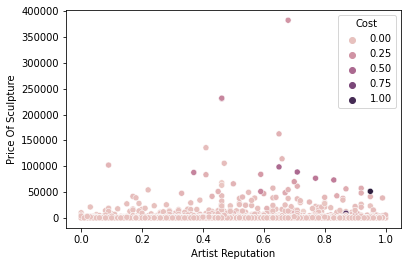

In [61]:
sns.scatterplot(x='Artist Reputation',y='Price Of Sculpture',hue='Cost',data=train)

<AxesSubplot:xlabel='Base Shipping Price', ylabel='Price Of Sculpture'>

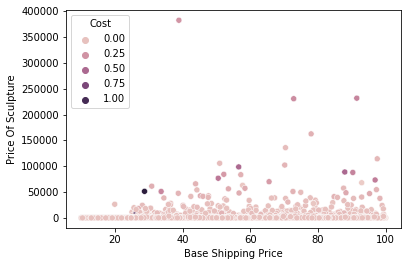

In [62]:
sns.scatterplot(x='Base Shipping Price',y='Price Of Sculpture',hue='Cost',data=train)

<h2>Converting categorical data to num </h2>

In [79]:
intern = pd.get_dummies(data=train['International'],drop_first=True,prefix='intern')

In [81]:
install = pd.get_dummies(data=train['Installation Included'],drop_first=True,prefix='install')

In [82]:
express = pd.get_dummies(data=train['Express Shipment'],drop_first=True,prefix='express')

In [83]:
frag = pd.get_dummies(data=train['Fragile'],drop_first=True,prefix='fragile')

In [149]:
cust_class = pd.get_dummies(data=train['Customer Information'],drop_first=True)

In [94]:
materials = pd.get_dummies(data=train['Material'],drop_first=True,prefix='material')

In [150]:
train = pd.concat([train,intern,install,express,frag,cust_class,materials],axis=1)

In [155]:
train.head()

,Customer Id,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost,intern_Yes,install_Yes,express_Yes,fragile_Yes,Working Class,material_Aluminium,material_Brass,material_Bronze,material_Clay,material_Marble,material_Stone,material_Wood
0,fffe3900350033003300,0.26,17.0,6.000000,4128.000000,13.91,16.27,-283.29,1,0,1,0,1,0,1,0,0,0,0,0
1,fffe3800330031003900,0.28,3.0,3.000000,61.000000,6.83,15.00,-159.96,0,0,0,0,1,0,1,0,0,0,0,0
2,fffe3600370035003100,0.07,8.0,5.000000,237.000000,4.96,21.18,-154.29,0,0,0,1,1,0,0,0,1,0,0,0
3,fffe350031003300,0.12,9.0,9.617647,400694.821918,5.81,16.31,-161.16,0,0,0,0,0,1,0,0,0,0,0,0
4,fffe3900320038003400,0.15,17.0,6.000000,324.000000,3.18,11.94,-159.23,1,1,1,0,1,1,0,0,0,0,0,0


In [214]:
X = train[['Artist Reputation', 'Height', 'Width', 'Weight',
       'Price Of Sculpture', 'Base Shipping Price', 'Working Class',
       'intern_Yes', 'install_Yes', 'express_Yes', 'fragile_Yes', 'material_Brass', 'material_Bronze',
       'material_Clay', 'material_Marble', 'material_Stone', 'material_Wood']]

In [215]:
Y = train['Cost'].abs()

<h2> Training and fitting model </h2>

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=50)

In [174]:
from sklearn.ensemble import RandomForestRegressor

In [216]:
rfg = RandomForestRegressor()

In [217]:
rfg.fit(X,Y)

RandomForestRegressor()

<h2>Cleaning Test data </h2>

In [181]:
test = pd.read_csv("test.csv")

In [182]:
test.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location
0,fffe3400310033003300,James Miller,0.35,53.0,18.0,871.0,Wood,5.98,19.11,Yes,Yes,No,Airways,No,Working Class,No,07/03/17,07/06/17,"Santoshaven, IA 63481"
1,fffe3600350035003400,Karen Vetrano,0.67,7.0,4.0,108.0,Clay,6.92,13.96,No,No,No,Roadways,Yes,Working Class,No,05/02/16,05/02/16,"Ericksonton, OH 98253"
2,fffe3700360030003500,Roseanne Gaona,0.61,6.0,5.0,97.0,Aluminium,4.23,13.62,Yes,No,No,Airways,No,Working Class,No,01/04/18,01/06/18,APO AP 83453
3,fffe350038003600,Todd Almanza,0.14,15.0,8.0,757.0,Clay,6.28,23.79,No,Yes,No,Roadways,Yes,Wealthy,No,09/14/17,09/17/17,"Antonioborough, AL 54778"
4,fffe3500390032003500,Francis Rivero,0.63,10.0,4.0,1673.0,Marble,4.39,17.83,No,Yes,Yes,Roadways,No,Working Class,Yes,12/03/17,12/02/17,"Lake Frances, LA 03040"


<AxesSubplot:>

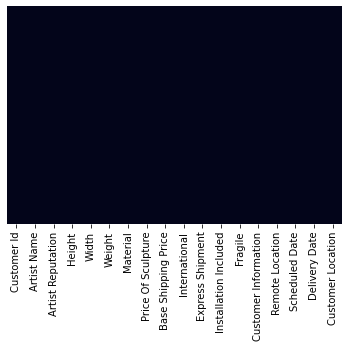

In [191]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [184]:
test['Artist Reputation'] = test['Artist Reputation'].apply(impute_artist)

In [185]:
test['Height'] = test['Height'].apply(impute_Height)

In [186]:
test['Width'] = test['Width'].apply(impute_width)

In [187]:
test['Weight'] = test['Weight'].apply(impute_weight)

In [189]:
test.drop('Transport',axis=1,inplace=True)

In [193]:
interns = pd.get_dummies(data=test['International'],drop_first=True,prefix='intern')

In [194]:
installs = pd.get_dummies(data=test['Installation Included'],drop_first=True,prefix='install')

In [195]:
express_s = pd.get_dummies(data=test['Express Shipment'],drop_first=True,prefix='express')

In [196]:
frag = pd.get_dummies(data=test['Fragile'],drop_first=True,prefix='fragile')

In [198]:
materials = pd.get_dummies(data=test['Material'],drop_first=True,prefix='material')

In [199]:
cust_class = pd.get_dummies(data=test['Customer Information'],drop_first=True)

In [200]:
test = pd.concat([test,interns,installs,express_s,frag,cust_class,materials],axis=1)

In [203]:
test.drop(['Artist Name','Material','International','Express Shipment','Installation Included','Fragile',
           'Customer Information', 'Remote Location', 'Scheduled Date',
       'Delivery Date', 'Customer Location',],axis=1,inplace=True)

In [204]:
test.head()

,Customer Id,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,intern_Yes,install_Yes,express_Yes,fragile_Yes,Working Class,material_Brass,material_Bronze,material_Clay,material_Marble,material_Stone,material_Wood
0,fffe3400310033003300,0.35,53.0,18.0,871.0,5.98,19.11,1,0,1,0,1,0,0,0,0,0,1
1,fffe3600350035003400,0.67,7.0,4.0,108.0,6.92,13.96,0,0,0,1,1,0,0,1,0,0,0
2,fffe3700360030003500,0.61,6.0,5.0,97.0,4.23,13.62,1,0,0,0,1,0,0,0,0,0,0
3,fffe350038003600,0.14,15.0,8.0,757.0,6.28,23.79,0,0,1,1,0,0,0,1,0,0,0
4,fffe3500390032003500,0.63,10.0,4.0,1673.0,4.39,17.83,0,1,1,0,1,0,0,0,1,0,0


In [209]:
X_test_1 

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,intern_Yes,install_Yes,express_Yes,fragile_Yes,Working Class,material_Brass,material_Bronze,material_Clay,material_Marble,material_Stone,material_Wood
0,0.35000,53.0,18.0,871.000000,5.98,19.11,1,0,1,0,1,0,0,0,0,0,1
1,0.67000,7.0,4.0,108.000000,6.92,13.96,0,0,0,1,1,0,0,1,0,0,0
2,0.61000,6.0,5.0,97.000000,4.23,13.62,1,0,0,0,1,0,0,0,0,0,0
3,0.14000,15.0,8.0,757.000000,6.28,23.79,0,0,1,1,0,0,0,1,0,0,0
4,0.63000,10.0,4.0,1673.000000,4.39,17.83,0,1,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0.36000,13.0,6.0,23511.000000,78.01,88.70,0,0,1,0,0,0,0,0,1,0,0
3496,0.72000,29.0,14.0,400694.821918,214.85,80.28,1,0,1,0,0,0,1,0,0,0,0
3497,0.59000,12.0,6.0,400694.821918,8.91,19.58,0,1,0,0,1,1,0,0,0,0,0
3498,0.46185,17.0,9.0,565.000000,6.75,10.89,0,1,1,0,0,0,0,0,0,0,0


In [218]:
pred_2 = rfg.predict(X_test_1)

In [219]:
pred_2

array([   258.625 ,    299.7291,    208.0694, ...,   1366.6448,
          292.5057, 132091.8473])

In [220]:
df = pd.DataFrame()

In [222]:
df['Customer Id']=test['Customer Id']
df['Cost']=pred_2

In [223]:
df.head()

,Customer Id,Cost
0,fffe3400310033003300,258.6250
1,fffe3600350035003400,299.7291
2,fffe3700360030003500,208.0694
3,fffe350038003600,220.3725
4,fffe3500390032003500,307.7632


In [224]:
df.to_csv('result.csv',index=False)